Mean Squared Error RF: 4943.850279381355
Mean Absolute Error RF: 53.40168644067796


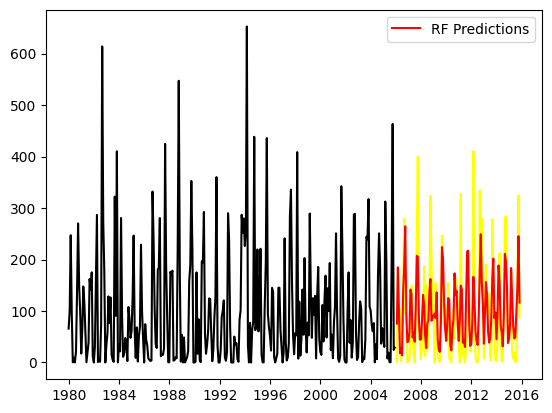

In [3]:
# Default hyper parameters
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
from sklearn.ensemble import RandomForestRegressor  # For regression tasks

warnings.filterwarnings("ignore")


# load data
weather = pd.read_csv("climatedatawithdate.csv")

# Create a target column
weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format
weather.sort_values(by='date', inplace=True)

weather['target'] = weather['puttalam'].shift(-1)
weather.dropna(inplace=True)        # Drop the last row

weather4 = weather.copy()

X_train =  weather4[weather4['date'] < pd.to_datetime("1/1/2006")].drop(['date', 'target'], axis=1)
y_train = weather4[weather4['date'] < pd.to_datetime("1/1/2006")]['target']

X_test =  weather4[weather4['date'] > pd.to_datetime("1/1/2006")].drop(['date', 'target'], axis=1)
y_test = weather4[weather4['date'] > pd.to_datetime("1/1/2006")]['target']


# Example with Random Forest for regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

# For example, selecting the top 25 most important features
sorted_indices = feature_importances.argsort()[::-1]
selected_features = X_train.columns[sorted_indices[:30]]

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train[selected_features], y_train)

y_pred = model.predict(X_test[selected_features])
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error RF:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error RF:", mae)

# plotting
train_dates = weather4[weather4['date'] < pd.to_datetime("1/1/2006")]['date']
test_dates = weather4[weather4['date'] > pd.to_datetime("1/1/2006")]['date']

plt.plot(train_dates, y_train.values, color="black")
plt.plot(test_dates, y_test.values, color="yellow")
plt.plot(test_dates, y_pred, color='red', label = 'RF Predictions')

plt.legend()

In [6]:
# Changed hyper parameters
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
from sklearn.ensemble import RandomForestRegressor  # For regression tasks

warnings.filterwarnings("ignore")


# load data
weather = pd.read_csv("climatedatawithdate.csv")

# Create a target column
weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format
weather.sort_values(by='date', inplace=True)

weather['target'] = weather['puttalam'].shift(-1)
weather.dropna(inplace=True)        # Drop the last row

weather4 = weather.copy()

X_train =  weather4[weather4['date'] < pd.to_datetime("1/1/2006")].drop(['date', 'target'], axis=1)
y_train = weather4[weather4['date'] < pd.to_datetime("1/1/2006")]['target']

X_test =  weather4[weather4['date'] > pd.to_datetime("1/1/2006")].drop(['date', 'target'], axis=1)
y_test = weather4[weather4['date'] > pd.to_datetime("1/1/2006")]['target']


# Example with Random Forest for regression
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

# For example, selecting the top 25 most important features
sorted_indices = feature_importances.argsort()[::-1]
selected_features = X_train.columns[sorted_indices[:30]]

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train[selected_features], y_train)

y_pred = model.predict(X_test[selected_features])
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error RF:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error RF:", mae)

# plotting
# train_dates = weather4[weather4['date'] < pd.to_datetime("1/1/2006")]['date']
# test_dates = weather4[weather4['date'] > pd.to_datetime("1/1/2006")]['date']

# plt.plot(train_dates, y_train.values, color="black")
# plt.plot(test_dates, y_test.values, color="yellow")
# plt.plot(test_dates, y_pred, color='red', label = 'RF Predictions')

# plt.legend()

Mean Squared Error RF: 5142.480367322033
Mean Absolute Error RF: 54.25305084745762


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use MSE as the evaluation metric
                           cv=5)  # Cross-validation with 5 folds

# Fit the grid search to your training data
grid_search.fit(X_train[selected_features], y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train your model
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train[selected_features], y_train)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test[selected_features])

# Calculate Mean Squared Error (MSE) with the best model
# mse_best = mean_squared_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error RF:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best)
print("Mean Absolute Error RF:", mae)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error RF: 5073.503563112559
Mean Absolute Error RF: 54.33371611196957


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define distributions for hyperparameters
param_dist = {
    'n_estimators': randint(100, 500),            # Random integer between 100 and 500
    'max_depth': [None] + list(randint(10, 50).rvs(10)),  # Generate random integers between 10 and 50
    'min_samples_split': uniform(0, 1).rvs(100),          # Generate random floats between 0 and 1
    'min_samples_leaf': randint(1, 5).rvs(100)            # Generate random integers between 1 and 5
}

# Create the random search object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of random combinations to try
                                   scoring='neg_mean_squared_error',  # Use MSE as the evaluation metric
                                   cv=5,  # Cross-validation with 5 folds
                                   random_state=42)

# Fit the random search to your training data
random_search.fit(X_train[selected_features], y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_
print("Best Hyperparameters (Random Search):", best_params_random)

# Use the best hyperparameters to train your model
best_model_random = RandomForestRegressor(random_state=42, **best_params_random)
best_model_random.fit(X_train[selected_features], y_train)

# Make predictions using the best model from random search
y_pred_best_random = best_model_random.predict(X_test[selected_features])

# Calculate Mean Squared Error (MSE) with the best model from random search
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
print("Best Mean Squared Error RF (Random Search):", mse_best_random)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best_random)
print("Mean Absolute Error RF:", mae)


Best Hyperparameters (Random Search): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 0.023726480723519572, 'n_estimators': 194}
Best Mean Squared Error RF (Random Search): 5074.677251285196
Mean Absolute Error RF: 54.2131840656068


In [8]:
random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10)


In [9]:
# Default hyper parameters
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
from sklearn.ensemble import RandomForestRegressor  # For regression tasks

warnings.filterwarnings("ignore")


# load data
weather = pd.read_csv("climatedatawithdate.csv")

# Create a target column
weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format
weather.sort_values(by='date', inplace=True)

weather['target'] = weather['puttalam'].shift(-1)
weather.dropna(inplace=True)        # Drop the last row

weather4 = weather.copy()

X_train =  weather4[weather4['date'] < pd.to_datetime("1/1/2006")].drop(['date', 'target'], axis=1)
y_train = weather4[weather4['date'] < pd.to_datetime("1/1/2006")]['target']

X_test =  weather4[weather4['date'] > pd.to_datetime("1/1/2006")].drop(['date', 'target'], axis=1)
y_test = weather4[weather4['date'] > pd.to_datetime("1/1/2006")]['target']


# Example with Random Forest for regression
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=30, min_samples_leaf=4, min_samples_split=10)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

# For example, selecting the top 25 most important features
sorted_indices = feature_importances.argsort()[::-1]
selected_features = X_train.columns[sorted_indices[:30]]

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train[selected_features], y_train)

y_pred = model.predict(X_test[selected_features])
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error RF:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error RF:", mae)

# plotting
# train_dates = weather4[weather4['date'] < pd.to_datetime("1/1/2006")]['date']
# test_dates = weather4[weather4['date'] > pd.to_datetime("1/1/2006")]['date']

# plt.plot(train_dates, y_train.values, color="black")
# plt.plot(test_dates, y_test.values, color="yellow")
# plt.plot(test_dates, y_pred, color='red', label = 'RF Predictions')

# plt.legend()

Mean Squared Error RF: 5056.690199508474
Mean Absolute Error RF: 53.98457627118644


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess your data (X_train, y_train, selected_features)

# Define your machine learning model with hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Choose a cross-validation strategy (e.g., k-fold cross-validation)
k = 5  # Number of folds (you can adjust this)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and specify the scoring metric (e.g., negative mean squared error)
scores = cross_val_score(model, X_train[selected_features], y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate the average score (mean of negative MSE scores)
avg_score = -scores.mean()
print(f"Average Mean Squared Error (Cross-Validation): {avg_score}")


Average Mean Squared Error (Cross-Validation): 9793.185756769955
